# Data Analytics Capstone Project Title: Austin Animal Center
> Predicting Animal Adoption Rates in Austin, Texas

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data1 = pd.read_csv("Austin_Animal_Center_Intakes.csv")
data2 = pd.read_csv("Austin_Animal_Center_Outcomes.csv")

In [4]:
data1.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A857105,Johnny Ringo,05/12/2022 12:23:00 AM,May 2022,4404 Sarasota Drive in Austin (TX),Public Assist,Normal,Cat,Neutered Male,2 years,Domestic Shorthair,Orange Tabby
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [5]:
data2.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [6]:
data1.shape

(154997, 12)

In [7]:
data2.shape

(154993, 12)

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154997 entries, 0 to 154996
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         154997 non-null  object
 1   Name              110218 non-null  object
 2   DateTime          154997 non-null  object
 3   MonthYear         154997 non-null  object
 4   Found Location    154997 non-null  object
 5   Intake Type       154997 non-null  object
 6   Intake Condition  154997 non-null  object
 7   Animal Type       154997 non-null  object
 8   Sex upon Intake   154995 non-null  object
 9   Age upon Intake   154996 non-null  object
 10  Breed             154997 non-null  object
 11  Color             154997 non-null  object
dtypes: object(12)
memory usage: 14.2+ MB


In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154993 entries, 0 to 154992
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         154993 non-null  object
 1   Name              110331 non-null  object
 2   DateTime          154993 non-null  object
 3   MonthYear         154993 non-null  object
 4   Date of Birth     154993 non-null  object
 5   Outcome Type      154964 non-null  object
 6   Outcome Subtype   71468 non-null   object
 7   Animal Type       154993 non-null  object
 8   Sex upon Outcome  154991 non-null  object
 9   Age upon Outcome  154953 non-null  object
 10  Breed             154993 non-null  object
 11  Color             154993 non-null  object
dtypes: object(12)
memory usage: 14.2+ MB


In [10]:
data2 = data2.drop(['Outcome Subtype'], axis=1)

In [11]:
# Find common column names
common_columns = data1.columns.intersection(data2.columns)

print("Common Columns:", list(common_columns))

Common Columns: ['Animal ID', 'Name', 'DateTime', 'MonthYear', 'Animal Type', 'Breed', 'Color']


In [12]:
# Merging the dataset
dataset = pd.merge(data1, data2, on=['Animal ID', 'Name', 'Animal Type', 'Breed', 'Color'])

In [13]:
dataset.shape

(198622, 18)

In [14]:
# To remove rows that are exact duplicates of each other
dataset = dataset.drop_duplicates()

In [15]:
dataset.shape

(198525, 18)

In [16]:
#finding out the number of unique animals.
unique_animal_id = dataset['Animal ID'].nunique()
print(unique_animal_id)

138163


In [17]:
dataset.head()

,Animal ID,Name,DateTime_x,MonthYear_x,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,DateTime_y,MonthYear_y,Date of Birth,Outcome Type,Sex upon Outcome,Age upon Outcome
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,01/08/2019 03:11:00 PM,Jan 2019,01/03/2017,Transfer,Neutered Male,2 years
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,07/05/2015 03:13:00 PM,Jul 2015,07/05/2007,Return to Owner,Spayed Female,8 years
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,04/21/2016 05:17:00 PM,Apr 2016,04/17/2015,Return to Owner,Neutered Male,1 year
3,A857105,Johnny Ringo,05/12/2022 12:23:00 AM,May 2022,4404 Sarasota Drive in Austin (TX),Public Assist,Normal,Cat,Neutered Male,2 years,Domestic Shorthair,Orange Tabby,05/12/2022 02:35:00 PM,May 2022,05/12/2020,Transfer,Neutered Male,2 years
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,07/02/2014 02:16:00 PM,Jul 2014,06/29/2010,Return to Owner,Neutered Male,4 years


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198525 entries, 0 to 198621
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         198525 non-null  object
 1   Name              153041 non-null  object
 2   DateTime_x        198525 non-null  object
 3   MonthYear_x       198525 non-null  object
 4   Found Location    198525 non-null  object
 5   Intake Type       198525 non-null  object
 6   Intake Condition  198525 non-null  object
 7   Animal Type       198525 non-null  object
 8   Sex upon Intake   198523 non-null  object
 9   Age upon Intake   198524 non-null  object
 10  Breed             198525 non-null  object
 11  Color             198525 non-null  object
 12  DateTime_y        198525 non-null  object
 13  MonthYear_y       198525 non-null  object
 14  Date of Birth     198525 non-null  object
 15  Outcome Type      198484 non-null  object
 16  Sex upon Outcome  198523 non-null  obj

In [19]:
# Data Overview
dataset.describe()

,Animal ID,Name,DateTime_x,MonthYear_x,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,DateTime_y,MonthYear_y,Date of Birth,Outcome Type,Sex upon Outcome,Age upon Outcome
count,198525,153041,198525,198525,198525,198525,198525,198525,198523,198524,198525,198525,198525,198525,198525,198484,198523,198485
unique,138163,26967,107197,120,63540,6,20,5,5,54,2861,629,128310,120,8074,10,5,54
top,A721033,Max,09/23/2016 12:00:00 PM,June 2015,Austin (TX),Stray,Normal,Dog,Intact Male,1 year,Domestic Shorthair Mix,Black/White,04/18/2016 12:00:00 AM,Jun 2019,05/20/2015,Adoption,Neutered Male,1 year
freq,1089,1147,71,2712,41232,129145,174038,123900,60022,34716,36925,21603,57,2815,1133,94532,76975,35143


In [20]:
# Count unique values in categorical columns
print(dataset['Animal Type'].value_counts())
print()
print(dataset['Intake Type'].value_counts())
print()
print(dataset['Outcome Type'].value_counts())

Dog          123900
Cat           65599
Other          8228
Bird            772
Livestock        26
Name: Animal Type, dtype: int64

Stray                 129145
Owner Surrender        47082
Public Assist          14685
Wildlife                5924
Abandoned               1405
Euthanasia Request       284
Name: Intake Type, dtype: int64

Adoption           94532
Transfer           48600
Return to Owner    40734
Euthanasia         10308
Rto-Adopt           1925
Died                1497
Disposal             740
Missing              110
Relocate              26
Stolen                12
Name: Outcome Type, dtype: int64


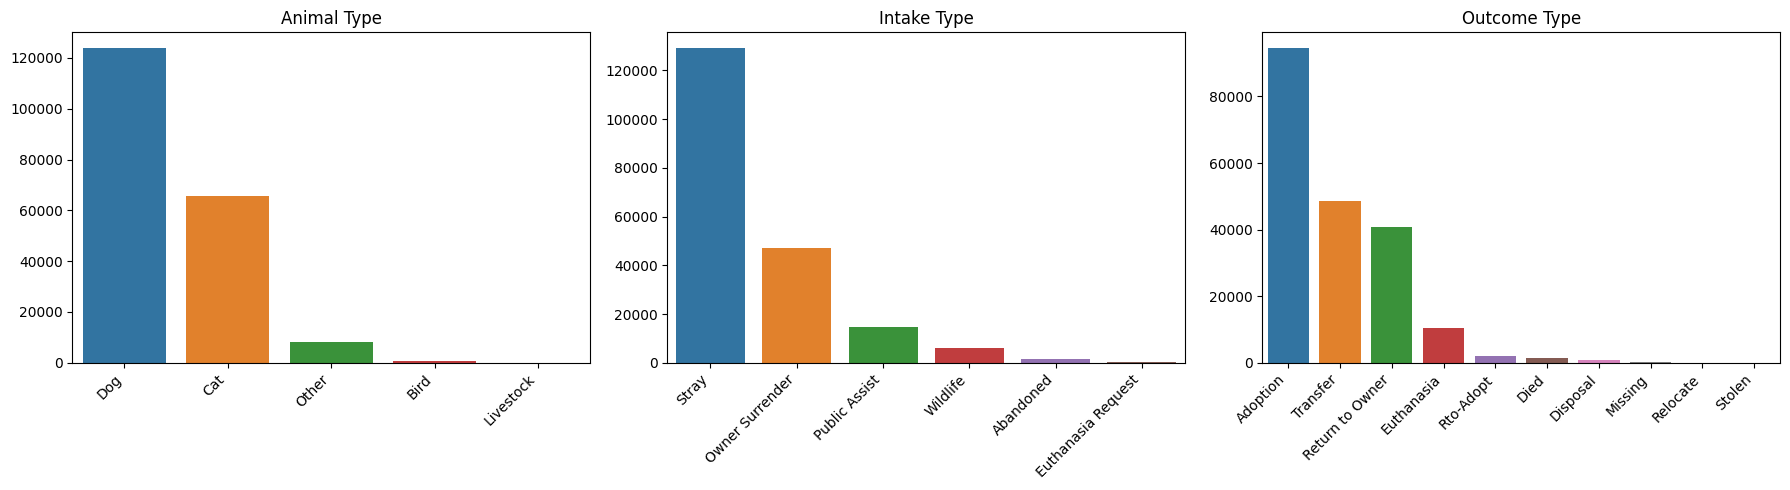

In [21]:
# Assuming 'dataset' is your DataFrame
animal_type_counts = dataset['Animal Type'].value_counts()
intake_type_counts = dataset['Intake Type'].value_counts()
outcome_type_counts = dataset['Outcome Type'].value_counts()

# Create a figure with subplots to display the counts of each column
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Plot the counts of 'Animal Type'
sns.barplot(x=animal_type_counts.index, y=animal_type_counts.values, ax=axes[0])
axes[0].set_title('Animal Type')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right')

# Plot the counts of 'Intake Type'
sns.barplot(x=intake_type_counts.index, y=intake_type_counts.values, ax=axes[1])
axes[1].set_title('Intake Type')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')

# Plot the counts of 'Outcome Type'
sns.barplot(x=outcome_type_counts.index, y=outcome_type_counts.values, ax=axes[2])
axes[2].set_title('Outcome Type')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

In [22]:
# Animal Types and Breeds
print(dataset['Animal Type'].unique())
print()
print("The number of unique values in Breed column", dataset['Breed'].nunique())

['Dog' 'Cat' 'Other' 'Bird' 'Livestock']

The number of unique values in Breed column 2861


In [23]:
# # Check for missing values
# missing_values = dataset.isnull().sum()
# print("Missing Values:")
# print(missing_values)

# # Remove rows with missing values in any column
# dataset.dropna(axis=0, how='any', inplace=True)

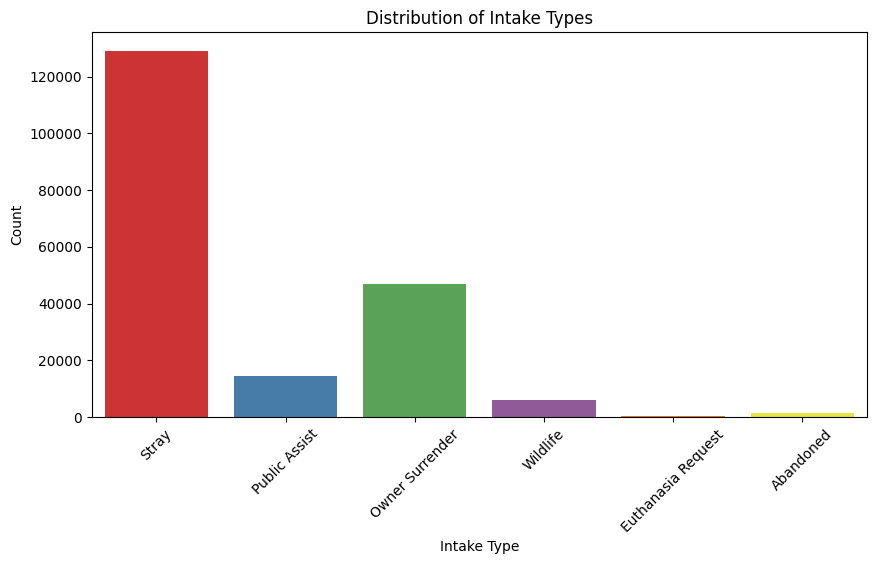

In [24]:
# Intake Patterns
# Count plot for Intake Type
plt.figure(figsize=(10, 5))
sns.countplot(x='Intake Type', data=dataset, palette='Set1')
plt.title('Distribution of Intake Types')
plt.xlabel('Intake Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

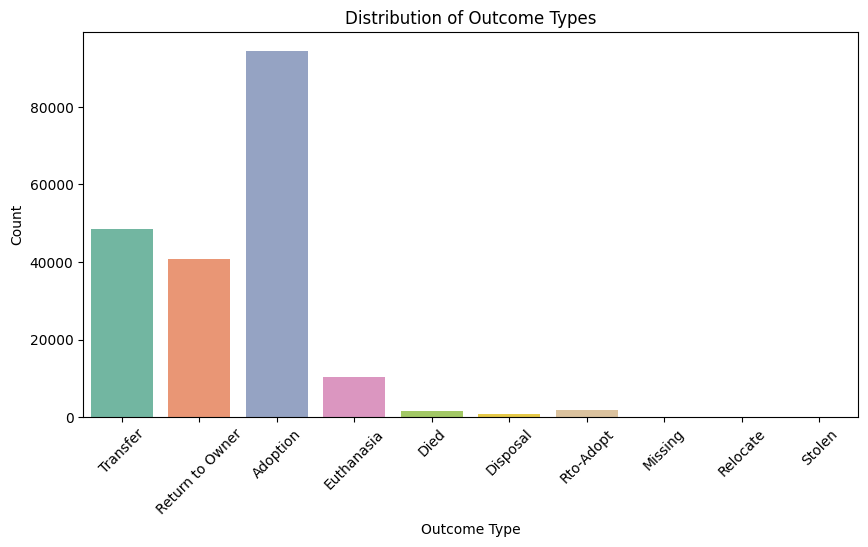

In [25]:
# Outcome Patterns
# Count plot for Outcome Type
plt.figure(figsize=(10, 5))
sns.countplot(x='Outcome Type', data=dataset, palette='Set2')
plt.title('Distribution of Outcome Types')
plt.xlabel('Outcome Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Time Analysis
dataset['DateTime_x'] = pd.to_datetime(dataset['DateTime_x'])
dataset['MonthYear_x'] = pd.to_datetime(dataset['MonthYear_x'])
print(dataset.resample('M', on='DateTime_x').size())  # Monthly intakes
print()
print(dataset.resample('M', on='MonthYear_x').size())  # Monthly outcomes

DateTime_x
2013-10-31    1833
2013-11-30    1602
2013-12-31    1511
2014-01-31    1595
2014-02-28    1480
              ... 
2023-05-31    1458
2023-06-30    1122
2023-07-31     798
2023-08-31     649
2023-09-30      13
Freq: M, Length: 120, dtype: int64

MonthYear_x
2013-10-31    1833
2013-11-30    1602
2013-12-31    1511
2014-01-31    1595
2014-02-28    1480
              ... 
2023-05-31    1458
2023-06-30    1122
2023-07-31     798
2023-08-31     649
2023-09-30      13
Freq: M, Length: 120, dtype: int64


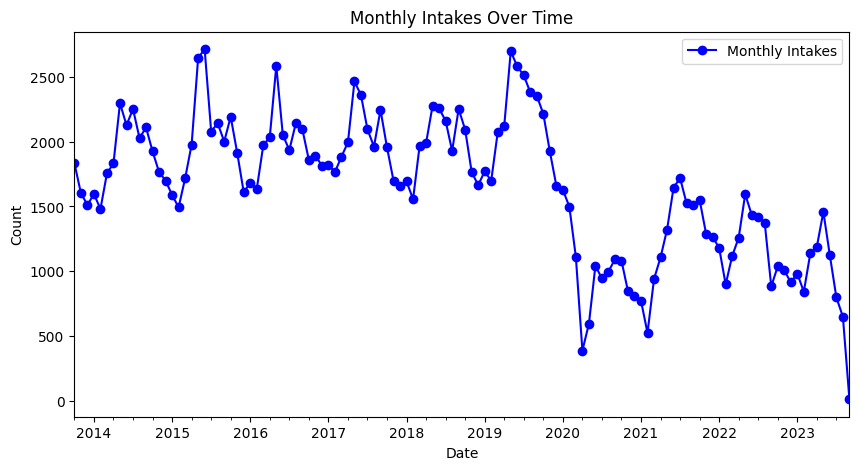

In [27]:
# Resampling by month for intakes
monthly_intakes = dataset.resample('M', on='DateTime_x').size()

# Plotting the monthly trends for intakes
plt.figure(figsize=(10, 5))
monthly_intakes.plot(kind='line', marker='o', color='blue', label='Monthly Intakes')
plt.title('Monthly Intakes Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

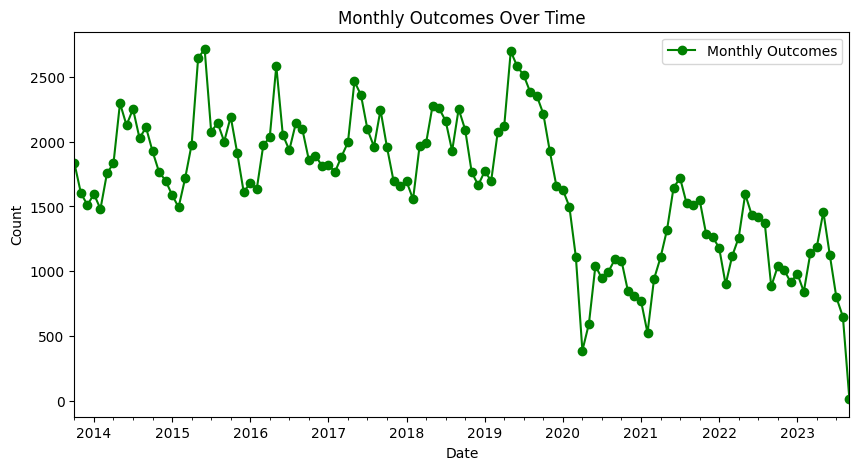

In [28]:
# Resampling by month for outcomes
monthly_outcomes = dataset.resample('M', on='MonthYear_x').size()

# Plotting the monthly trends for outcomes
plt.figure(figsize=(10, 5))
monthly_outcomes.plot(kind='line', marker='o', color='green', label='Monthly Outcomes')
plt.title('Monthly Outcomes Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

In [29]:
# Age Distribution
# Calculate age in years
def age_in_years(age_string):
    try:
        # If the input is already a float (e.g., 3.5 years), return it as is
        return float(age_string)
    except ValueError:
        age_parts = age_string.split()
        if len(age_parts) == 2:
            if age_parts[1] == 'years':
                return float(age_parts[0])
            elif age_parts[1] == 'months':
                return float(age_parts[0]) / 12
    return None


dataset['Age upon Intake'] = dataset['Age upon Intake'].apply(age_in_years)
dataset['Age upon Outcome'] = dataset['Age upon Outcome'].apply(age_in_years)

print(dataset['Age upon Intake'].describe())
print()
print(dataset['Age upon Outcome'].describe())

count    126875.000000
mean          3.076029
std           3.152647
min          -3.000000
25%           0.583333
50%           2.000000
75%           4.000000
max          30.000000
Name: Age upon Intake, dtype: float64

count    144433.000000
mean          2.765272
std           3.118675
min          -3.000000
25%           0.333333
50%           2.000000
75%           4.000000
max          30.000000
Name: Age upon Outcome, dtype: float64


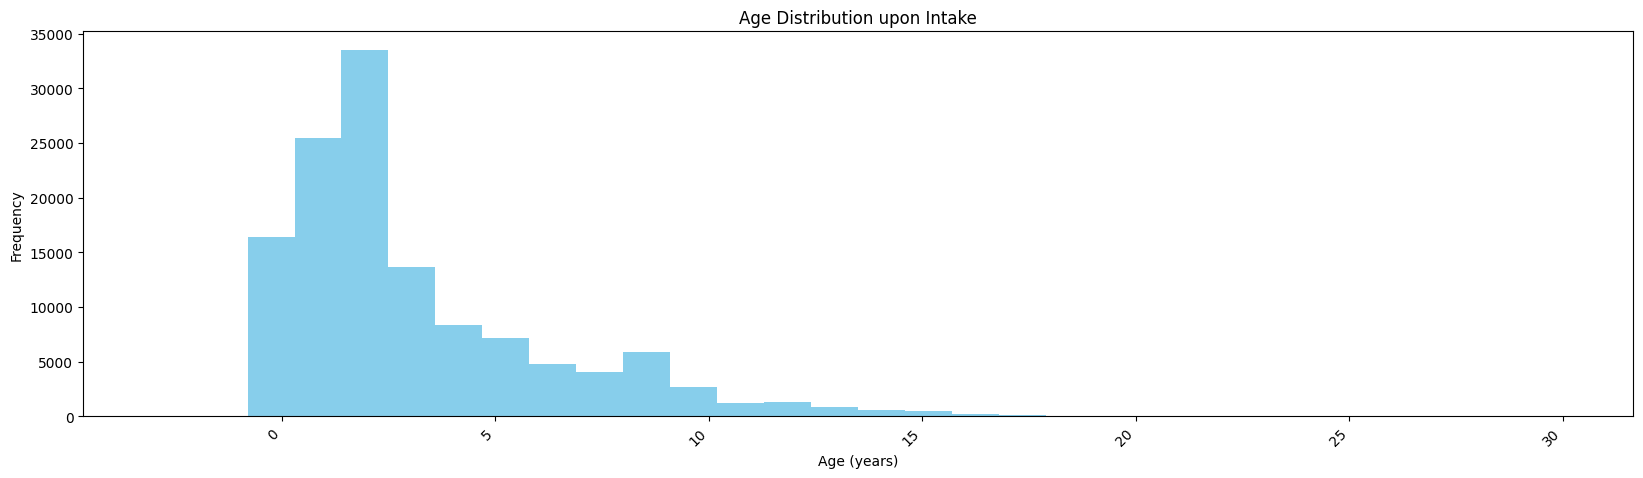

In [30]:
# Filter out NaN values before plotting
age_upon_intake = dataset['Age upon Intake'].dropna()

# Plotting the age distribution for intake
plt.figure(figsize=(20,5))
plt.hist(age_upon_intake, bins=30, color='skyblue')
plt.title('Age Distribution upon Intake')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

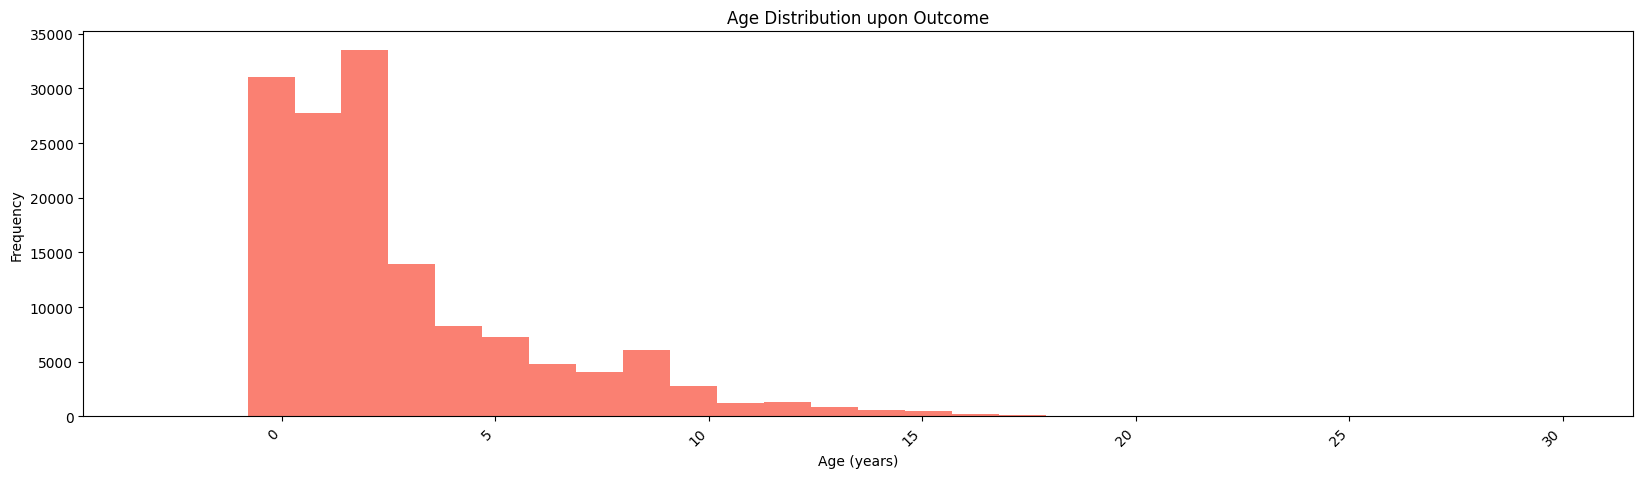

In [31]:
# Filter out NaN values before plotting
age_upon_outcome = dataset['Age upon Outcome'].dropna()

# Plotting the age distribution for outcome
plt.figure(figsize=(20, 5))
plt.hist(age_upon_outcome, bins=30, color='salmon')
plt.title('Age Distribution upon Outcome')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

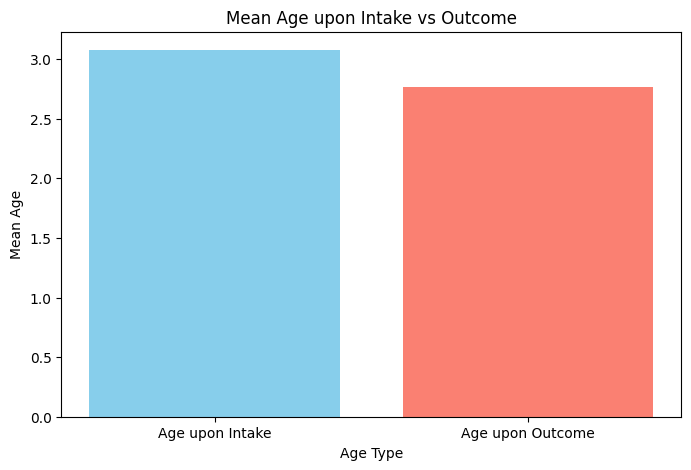

In [32]:
# Calculate mean age upon intake and outcome
mean_age_intake = dataset['Age upon Intake'].mean()
mean_age_outcome = dataset['Age upon Outcome'].mean()

# Create a bar graph for mean ages
plt.figure(figsize=(8, 5))
plt.bar(['Age upon Intake', 'Age upon Outcome'], [mean_age_intake, mean_age_outcome], color=['skyblue', 'salmon'])
plt.title('Mean Age upon Intake vs Outcome')
plt.xlabel('Age Type')
plt.ylabel('Mean Age')
plt.show()

In [33]:
# Sex and Gender Analysis
print(dataset['Sex upon Intake'].value_counts())
print(dataset['Sex upon Outcome'].value_counts())

Intact Male      60022
Intact Female    55399
Neutered Male    39681
Spayed Female    31313
Unknown          12108
Name: Sex upon Intake, dtype: int64
Neutered Male    76975
Spayed Female    65500
Intact Male      22728
Intact Female    21212
Unknown          12108
Name: Sex upon Outcome, dtype: int64


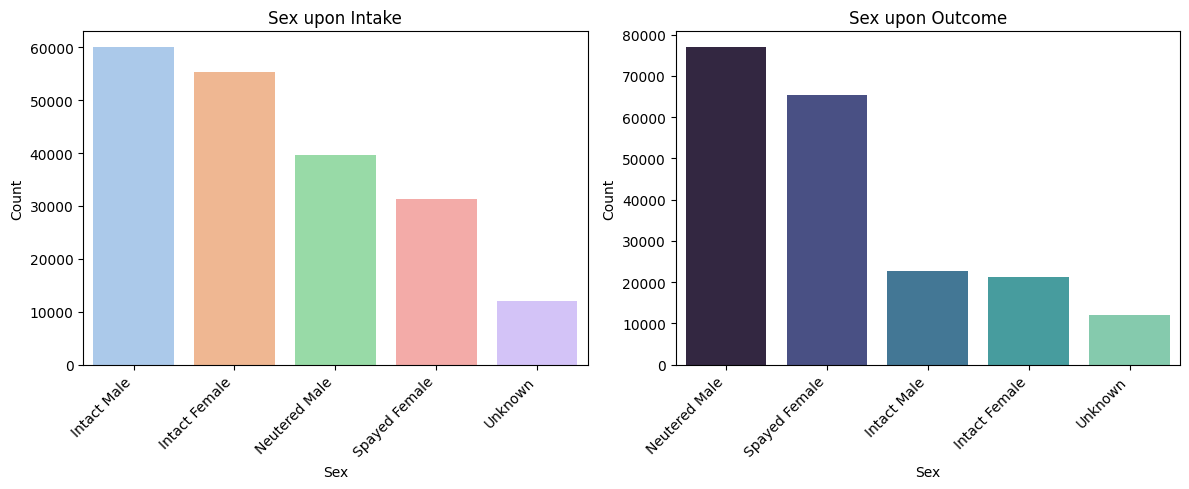

In [34]:
# Data
sex_upon_intake = dataset['Sex upon Intake'].value_counts()
sex_upon_outcome = dataset['Sex upon Outcome'].value_counts()

# Create subplots for visual comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot for Sex upon Intake
sns.barplot(x=sex_upon_intake.index, y=sex_upon_intake.values, ax=ax[0], palette='pastel')
ax[0].set_title('Sex upon Intake')
ax[0].set_xlabel('Sex')
ax[0].set_ylabel('Count')

# Bar plot for Sex upon Outcome
sns.barplot(x=sex_upon_outcome.index, y=sex_upon_outcome.values, ax=ax[1], palette='mako')
ax[1].set_title('Sex upon Outcome')
ax[1].set_xlabel('Sex')
ax[1].set_ylabel('Count')

# Rotate x-axis labels for better readability
for a in ax:
    a.set_xticklabels(a.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


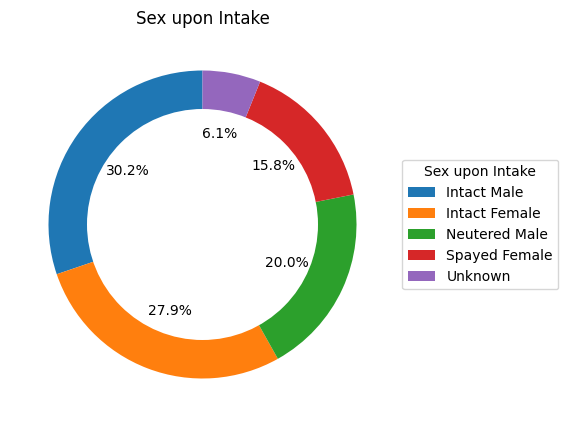

In [35]:
# Data
sex_upon_intake = dataset['Sex upon Intake'].value_counts()

# Create figure and subplot for Sex upon Intake
fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))

# Plot for Sex upon Intake
wedges1, texts1, autotexts1 = ax1.pie(sex_upon_intake, autopct='%1.1f%%', startangle=90)
ax1.set_title('Sex upon Intake')

# Draw a circle at the center to make it a donut chart
centre_circle1 = plt.Circle((0,0), 0.75, fc='white')
ax1.add_artist(centre_circle1)

# Adding legend for Sex upon Intake
ax1.legend(wedges1, sex_upon_intake.index, title='Sex upon Intake', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

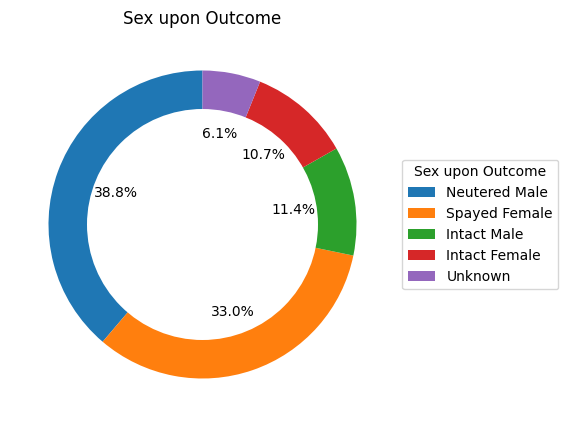

In [36]:
# Data
sex_upon_outcome = dataset['Sex upon Outcome'].value_counts()

# Create figure and subplot for Sex upon Outcome
fig, ax2 = plt.subplots(1, 1, figsize=(5, 5))

# Plot for Sex upon Outcome
wedges2, texts2, autotexts2 = ax2.pie(sex_upon_outcome, autopct='%1.1f%%', startangle=90)
ax2.set_title('Sex upon Outcome')

# Draw a circle at the center to make it a donut chart
centre_circle2 = plt.Circle((0,0), 0.75, fc='white')
ax2.add_artist(centre_circle2)

# Adding legend for Sex upon Outcome
ax2.legend(wedges2, sex_upon_outcome.index, title='Sex upon Outcome', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


In [37]:
# Color Analysis
print(dataset['Color'].value_counts())

Black/White            21603
Black                  15274
Brown Tabby             9863
Brown                   7498
Brown/White             7374
                       ...  
Calico/Gray Tabby          1
Lynx Point/Blue            1
Orange/Gray                1
Lilac Point/Gray           1
Red Merle/Red Merle        1
Name: Color, Length: 629, dtype: int64


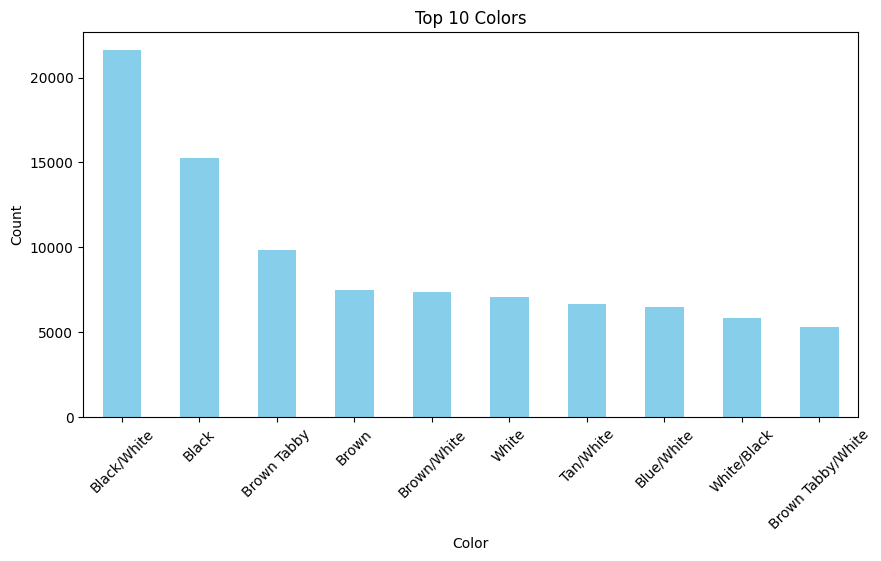

In [38]:
top_colors = dataset['Color'].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_colors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Colors')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [39]:
# Names Analysis
print(dataset['Name'].count())  # Count of named animals

153041


In [40]:
# Location Analysis
print(dataset['Found Location'].value_counts())

Austin (TX)                                        41232
Travis (TX)                                         4086
Outside Jurisdiction                                3672
7201 Levander Loop in Austin (TX)                   1575
Pflugerville (TX)                                   1031
                                                   ...  
Stradford Drive in Austin (TX)                         1
11300 Robert Wooding in Austin (TX)                    1
13619 S Turnersville Rd in Travis (TX)                 1
10806 Hard Rock Road in Austin (TX)                    1
Thomaswood Lane And Lenape Trail in Austin (TX)        1
Name: Found Location, Length: 63540, dtype: int64


<ipython-input-41-db605fb44243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


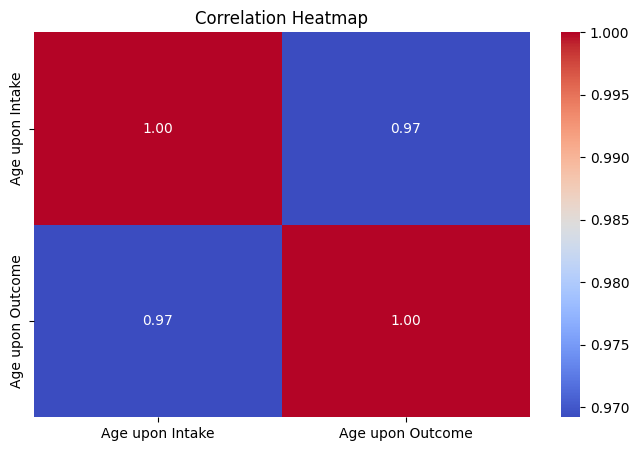

In [41]:
correlation_matrix = dataset.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Analysis Questions

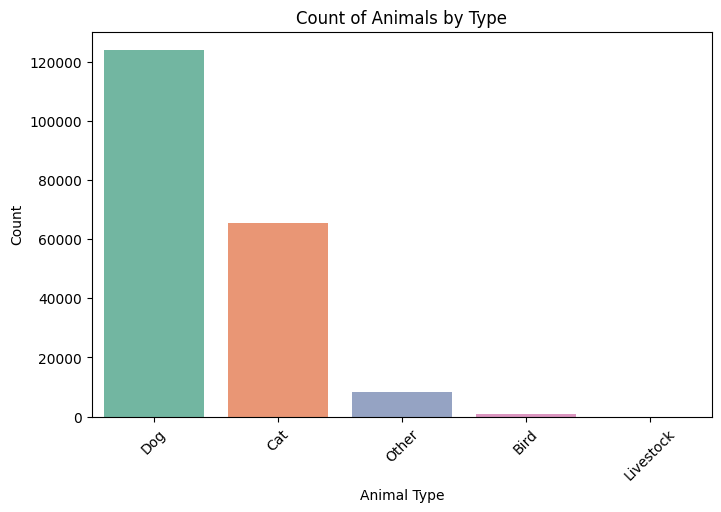

In [42]:
# 1. Unique Values in 'Animal Type':
# What is the distribution of different animal types in the dataset?

# Bar plot for the count of each unique animal type
plt.figure(figsize=(8, 5))
sns.countplot(x='Animal Type', data=dataset, palette='Set2')
plt.title('Count of Animals by Type')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

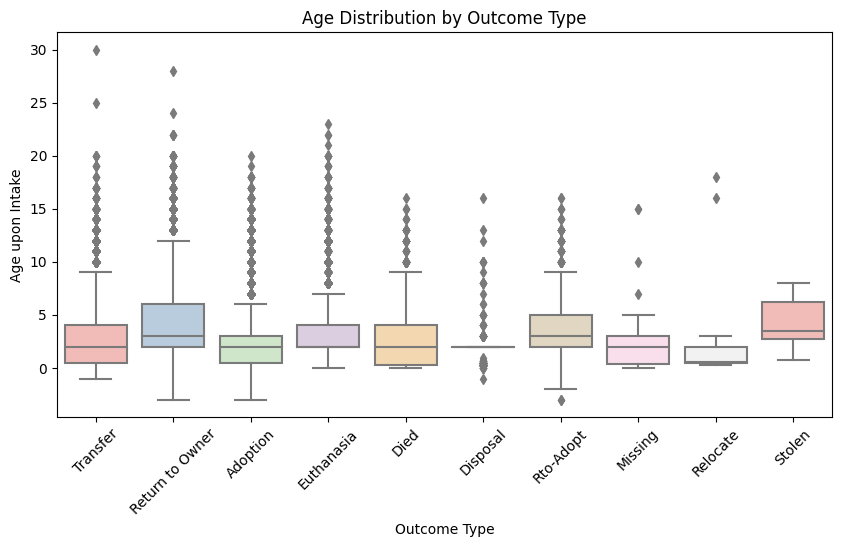

In [43]:
# 2.Age Distribution by Outcome Type:
# How does the age of animals upon intake relate to different outcome types?

# Box plot for age distribution by outcome type
plt.figure(figsize=(10, 5))
sns.boxplot(x='Outcome Type', y='Age upon Intake', data=dataset, palette='Pastel1')
plt.title('Age Distribution by Outcome Type')
plt.xlabel('Outcome Type')
plt.ylabel('Age upon Intake')
plt.xticks(rotation=45)
plt.show()

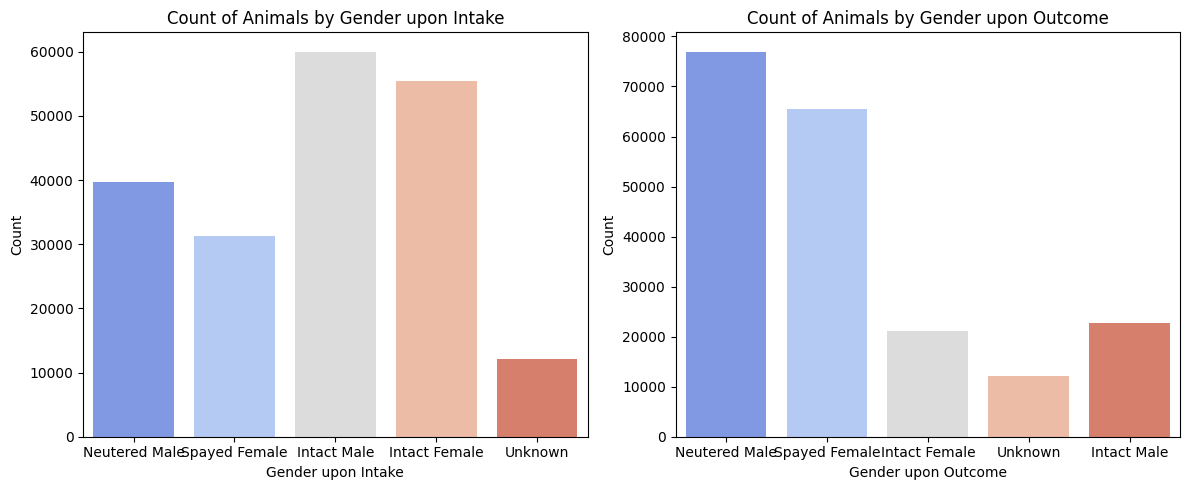

In [44]:
# 3.Gender Analysis:
# What is the gender distribution of animals upon intake and outcome?

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot for gender upon intake
sns.countplot(x='Sex upon Intake', data=dataset, palette='coolwarm', ax=axes[0])
axes[0].set_title('Count of Animals by Gender upon Intake')
axes[0].set_xlabel('Gender upon Intake')
axes[0].set_ylabel('Count')

# Count plot for gender upon outcome
sns.countplot(x='Sex upon Outcome', data=dataset, palette='coolwarm', ax=axes[1])
axes[1].set_title('Count of Animals by Gender upon Outcome')
axes[1].set_xlabel('Gender upon Outcome')
axes[1].set_ylabel('Count')

# Automatically adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

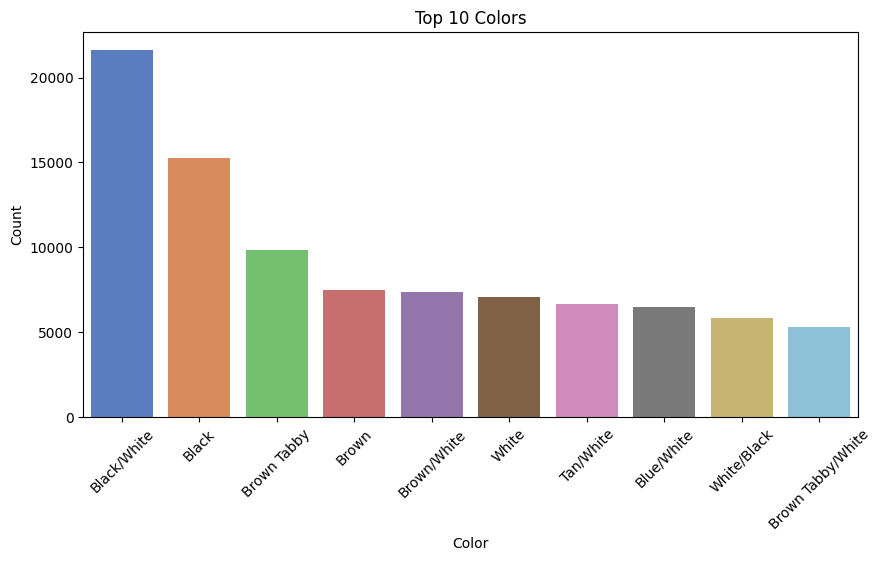

In [45]:
# 4.Color Analysis:
# What are the top 10 colors in the dataset, and how frequently do they occur?

# Count plot for the top 10 colors
top_colors = dataset['Color'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_colors.index, y=top_colors.values, palette='muted')
plt.title('Top 10 Colors')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

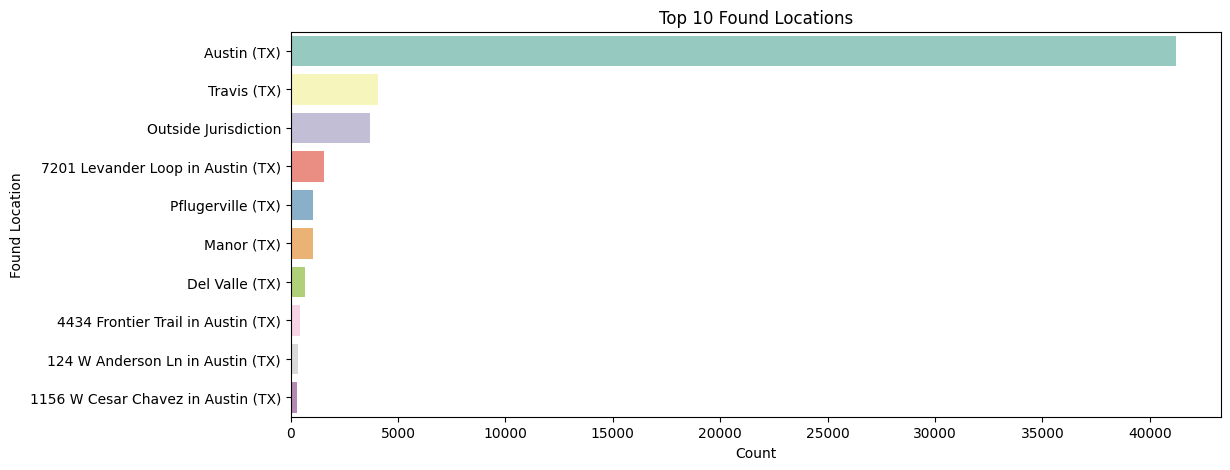

In [46]:
# 5.Location Analysis:
# What are the top 10 found locations of animals, and how do they compare in frequency?

# Bar plot for found location
plt.figure(figsize=(12, 5))
sns.countplot(y='Found Location', data=dataset, order=dataset['Found Location'].value_counts().index[:10], palette='Set3')
plt.title('Top 10 Found Locations')
plt.xlabel('Count')
plt.ylabel('Found Location')
plt.show()

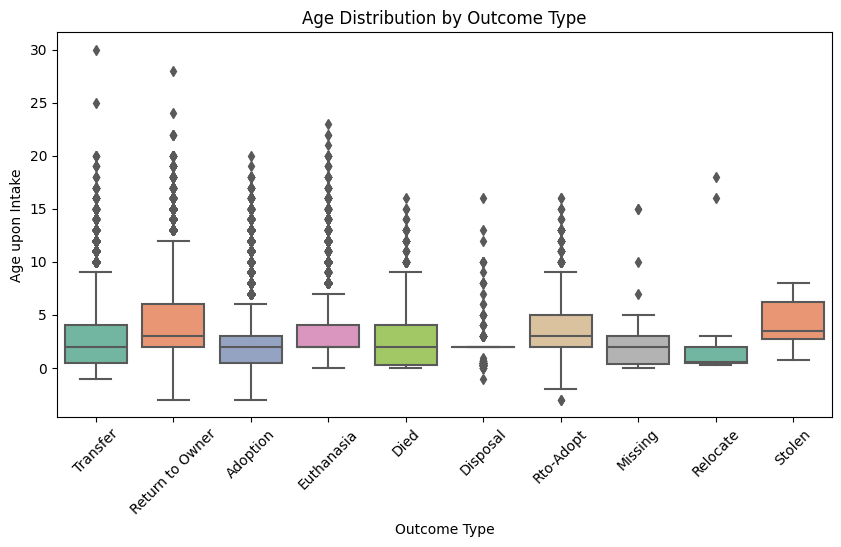

In [47]:
# 6. Age vs. Outcome Type:
# How does the age upon intake relate to different outcome types for animals?

# Box plot: Age distribution by Outcome Type
plt.figure(figsize=(10, 5))
sns.boxplot(x='Outcome Type', y='Age upon Intake', data=dataset, palette='Set2')
plt.title('Age Distribution by Outcome Type')
plt.xlabel('Outcome Type')
plt.ylabel('Age upon Intake')
plt.xticks(rotation=45)
plt.show()

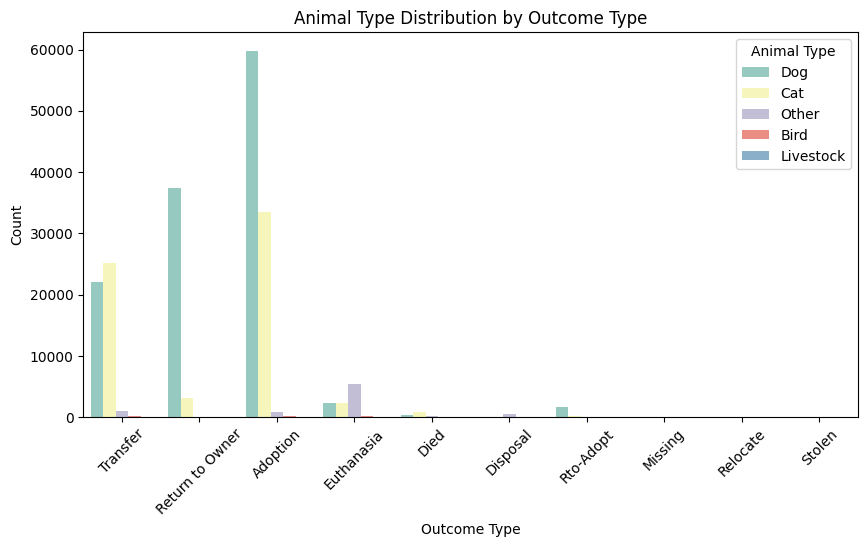

In [48]:
# 7. Animal Type and Outcome Type:
# Is there a relationship between the animal type and the different outcome types?

# Count plot: Animal Type distribution by Outcome Type
plt.figure(figsize=(10, 5))
sns.countplot(x='Outcome Type', hue='Animal Type', data=dataset, palette='Set3')
plt.title('Animal Type Distribution by Outcome Type')
plt.xlabel('Outcome Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Animal Type')
plt.show()

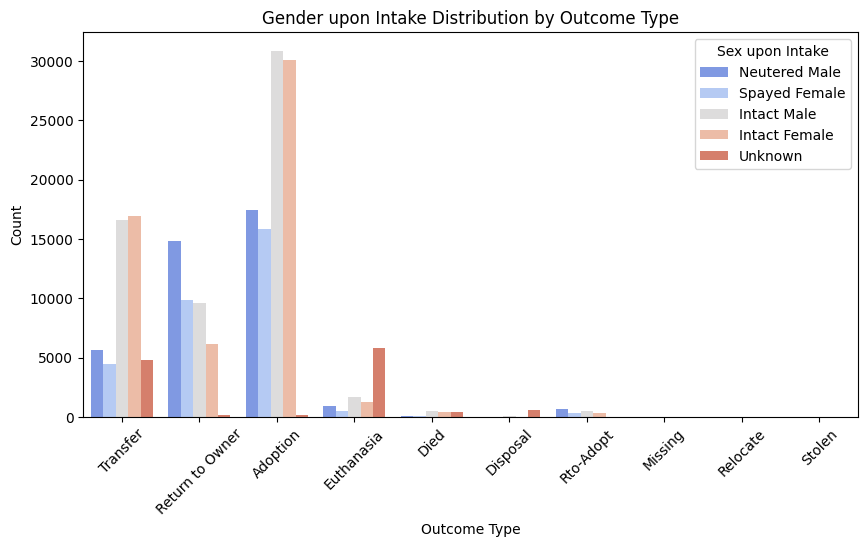

In [49]:
# 8. Gender and Outcome Type:
# How does the gender upon intake relate to different outcome types?

# Count plot: Gender upon Intake distribution by Outcome Type
plt.figure(figsize=(10, 5))
sns.countplot(x='Outcome Type', hue='Sex upon Intake', data=dataset, palette='coolwarm')
plt.title('Gender upon Intake Distribution by Outcome Type')
plt.xlabel('Outcome Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sex upon Intake')
plt.show()

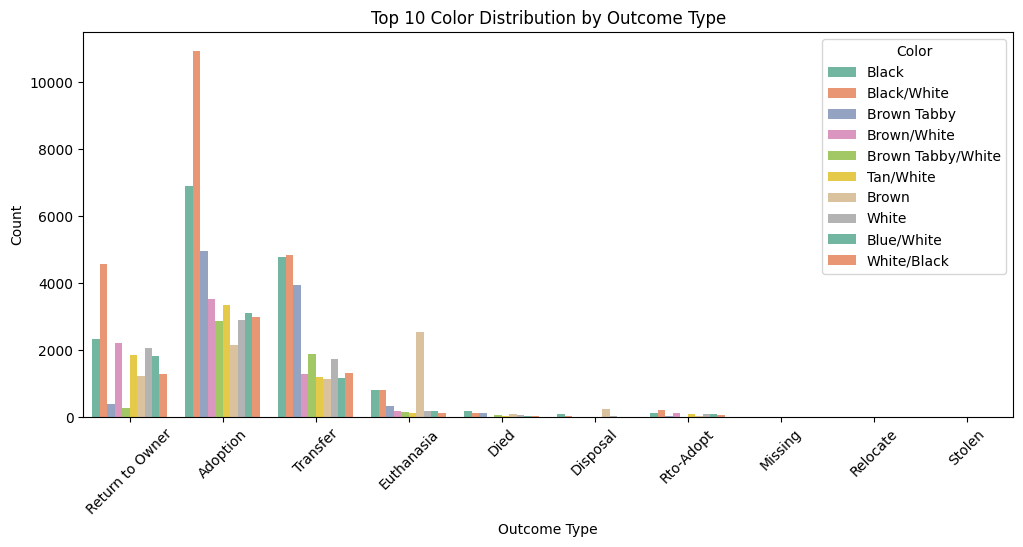

In [50]:
# 9. Color and Outcome Type:
# Is there a correlation between the color of the animal and the type of outcome?

# Get the top 10 colors
top_colors = dataset['Color'].value_counts().head(10).index
# Filter the dataset to include only the top 10 colors
dataset_top_colors = dataset[dataset['Color'].isin(top_colors)]

# Count plot: Color distribution by Outcome Type for the top 10 colors
plt.figure(figsize=(12, 5))
sns.countplot(x='Outcome Type', hue='Color', data=dataset_top_colors, palette='Set2')
plt.title('Top 10 Color Distribution by Outcome Type')
plt.xlabel('Outcome Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

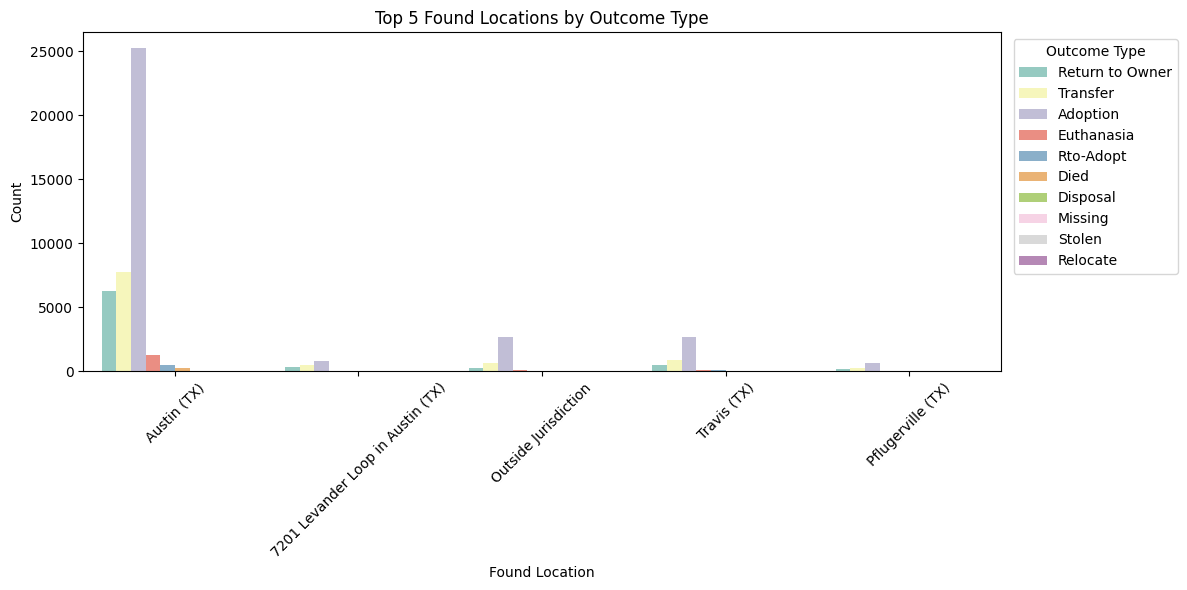

In [51]:
# 10. Found Location and Outcome Type:
# How do the top 5 found locations correspond to different outcome types for animals?

# Get the top 5 found locations
top_found_locations = dataset['Found Location'].value_counts().head(5).index
# Filter the dataset for the top 5 found locations
dataset_top_locations = dataset[dataset['Found Location'].isin(top_found_locations)]

# Count plot: Found Location distribution by Outcome Type for the top 5 locations
plt.figure(figsize=(12, 6))
sns.countplot(x='Found Location', hue='Outcome Type', data=dataset_top_locations, palette='Set3')
plt.title('Top 5 Found Locations by Outcome Type')
plt.xlabel('Found Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Outcome Type', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()
